<h1><center>Lego Real-World Data Analysis</center></h1>
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"/>

<h2>Project Instructions</h2>

You are a Data Analyst at Lego working with the Sales/Customer Success teams. The Account Executive responsible for the Star Wars partnership has asked for specific information in preparation for their meeting with the Star Wars team. Although Star Wars was critical to the survival of the brand, Lego has since introduced a wide variery of licensed sets over subsequent years.

<ol>
    <li>What percentage of all licensed sets ever released were Star Wars themed ? (the answer will be saved as a variable <b><i>the_force</i></b>)</li> 
    <li>In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year) ? (the answer will be saved as a variable <b><i>new_era</i></b>)</li>
  
</ol>

<h2>Data Description</h2>

<h3>lego_sets</h3>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b>This column is critical, a missing value indicates that set is a duplicate or invalid.</b></li>
    <li><b>set_name:</b> A name for every set in the dataset</li>
    <li><b>year:</b> The date the set was released</li>
    <li><b>num_parts:</b> The number of parts contained in the set. <b>This column is not central to our analyses, so missing values are acceptable</b></li>
    <li><b>theme_name:</b> The name of the sub-theme of the set</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. <b>Matches the name column of the parent_themes csv file</b></li>
</ul>

<h3>parent_themes</h3>
<ul>
    <li><b>id:</b> A code that is unique to every theme</li>
    <li><b>name:</b> The name of the parent theme</li>
    <li><b>is_licensed</b> A Boolean column specifying whether the theme is a licensed theme</li>
</ul>


In [17]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Read in the raw CSV datasets
df = pd.read_csv("lego_sets.csv")
themes = pd.read_csv("parent_themes.csv")

In [19]:
#Check first five rows of data
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [20]:
themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [21]:
#Shape (rows and columns) of the df dataframe
df.shape

(11986, 6)

In [22]:
themes.shape

(111, 3)

In [23]:
#Displays the information about df dataframe which includes
#data types non null count in coulumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [24]:
#Displays  the information abouth the themes dataframe which includes
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


In [124]:
#Descriptive statistics for df dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11833.0,2002.172568,13.495910,1950.0,1997.0,2006.0,2013.0,2017.0
num_parts,6835.0,162.149086,332.799982,-1.0,10.0,45.0,170.0,5922.0


In [26]:
#Shows all the rows that have missing values in the set_num column (153)
df.loc[df['set_num'].isna()]

,set_num,name,year,num_parts,theme_name,parent_theme
11833,NaN,NaN,2017,347.0,NaN,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess
11835,NaN,NaN,2016,NaN,NaN,Disney Princess
11836,NaN,NaN,2017,304.0,NaN,Super Heroes
11837,NaN,NaN,2017,196.0,NaN,Super Heroes
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [27]:
#Drops all the missing values in the "set_num" column 
df.dropna(axis=0, subset=['set_num'], inplace=True)

In [28]:
#Can see the missing values in "set_num" was dropped in turn
#the missing values in the "name" and "theme_name" column was also dropped
df.isna().sum()

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64

In [29]:
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [30]:
df.loc[df['num_parts'].isna()]

,set_num,name,year,num_parts,theme_name,parent_theme
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
...,...,...,...,...,...,...
11825,W098-1,"Watch Set, Classic Blue",2006,NaN,Gear,Gear
11827,Watford-1,"LEGO Store Grand Opening Exclusive Set, Watfor...",2013,NaN,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [31]:
#Show the datatypes in the df dataframe
df.dtypes

set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

In [32]:
#Merge the two dataframes together 
merged_df = pd.merge(df, themes, left_on='parent_theme', right_on='name', how='inner')

In [33]:
#Display the merged dataframe
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False


In [34]:
#Rename the columns in the dataframe
merged_df.rename(columns={"name_x":"name", "id":"theme_id"}, inplace=True)

In [35]:
#Drop the name_y column
merged_df.drop(['name_y'], axis=1, inplace=True)

In [36]:
#Check if the name_y column is dropped
merged_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [37]:
#Display the dataframe 
merged_df

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


In [38]:
#The counts for the different licensed values
merged_df['is_licensed'].value_counts()

is_licensed
False    10654
True      1179
Name: count, dtype: int64

In [39]:
#Create a dataframe with licensed themes
licensed_df = merged_df.loc[merged_df['is_licensed'] == True]

In [40]:
licensed_df

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [41]:
#Show the count for each parent theme in the licensed dataframe
licensed_df['parent_theme'].value_counts()

parent_theme
Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Scooby-Doo                            6
Disney's Mickey Mouse                 6
Prince of Persia                      6
Angry Birds                           6
Ben 10                                6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: count, dtype: int64

In [42]:
total_lic_sets = licensed_df['parent_theme'].value_counts().sum()
total_lic_sets

1179

In [43]:
star_wars_sets = licensed_df['parent_theme'].value_counts()['Star Wars']
star_wars_sets

609

In [44]:
star_wars_perc = round((star_wars_sets / total_lic_sets) * 100, 2)
the_force = int(star_wars_perc)

#The force is the percentage (integer) of star wars films from the integer 
the_force

51

In [45]:
#Show licensed dataframe
licensed_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True


In [46]:
#Groupby function that groups the licensed dataframe by year and parent theme
#This will produce a count in the is_licensed column
licensed_grp = licensed_df.groupby(['year', 'parent_theme']).sum()

In [47]:
#We reset the index to visually see the data frame better
licensed_grp = licensed_grp.reset_index()

In [48]:
#Keep all the necessary columns and drop the rest
licensed_grp = licensed_grp[['year', 'parent_theme', 'is_licensed']]

In [49]:
#Rename the column to count so that it makes more sense 
licensed_grp.rename(columns={"is_licensed":"count"}, inplace=True)

In [50]:
#This will sort the values by tthe count and will then drop the duplicates that
#any value that has the same year is considered as a duplicate
max_theme_df = licensed_grp.sort_values('count', ascending=False).drop_duplicates(['year'])

In [51]:
#Displayed the max_theme_df and can see that in 2017 Super Heroes beat Star Wars in being the most 
#successful in that year
max_theme_df

,year,parent_theme,count
82,2017,Super Heroes,72
76,2016,Star Wars,61
67,2015,Star Wars,58
59,2014,Star Wars,45
47,2012,Star Wars,43
32,2009,Star Wars,39
52,2013,Star Wars,35
9,2003,Star Wars,32
42,2011,Star Wars,32
36,2010,Star Wars,30


In [52]:
new_era = max_theme_df.loc[max_theme_df['parent_theme'] != 'Star Wars']['year']

In [53]:
new_era

82    2017
Name: year, dtype: int64

<h3>Bonus Questions</h3>

The manufacturing team have come to the Data Analytics team looking to cut the costs of the amount of lego they are manufacturing they want to know which sets use the most amount of parts.

<h3>Find the average number of parts per Set</h3>

In [55]:
merged_df

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


In [56]:
#Check the amount of missing values
merged_df.isnull().sum()

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
theme_id           0
is_licensed        0
dtype: int64

In [57]:
#Remove all the missing values
clean_df = merged_df.loc[~merged_df['num_parts'].isnull()]

In [58]:
clean_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
10,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False


In [59]:
clean_df.shape

(6835, 8)

In [60]:
#Groupby parent theme and find the average number of parts per set
avg_num_parts_per_set = clean_df.groupby(['parent_theme'])['num_parts'].mean().reset_index()

In [61]:
#Rename the column
avg_num_parts_per_set.rename(columns={"num_parts":"avg_num_parts"}, inplace=True)

In [62]:
#Sort the values by the average number of parts in Descending order
avg_num_parts_per_set.sort_values('avg_num_parts', ascending=False, inplace=True)

In [63]:
avg_num_parts_per_set.head()

,parent_theme,avg_num_parts
29,Disney,4060.000000
80,Sculptures,1904.117647
64,Modular Buildings,1670.375000
36,FIRST LEGO League,1469.714286
63,Model Team,725.875000


In [64]:
type(avg_num_parts_per_set)

pandas.core.frame.DataFrame

In [65]:
high_avg_parts = avg_num_parts_per_set.loc[avg_num_parts_per_set['avg_num_parts'] > 350]

Text(0, 0.5, 'Average number of parts')

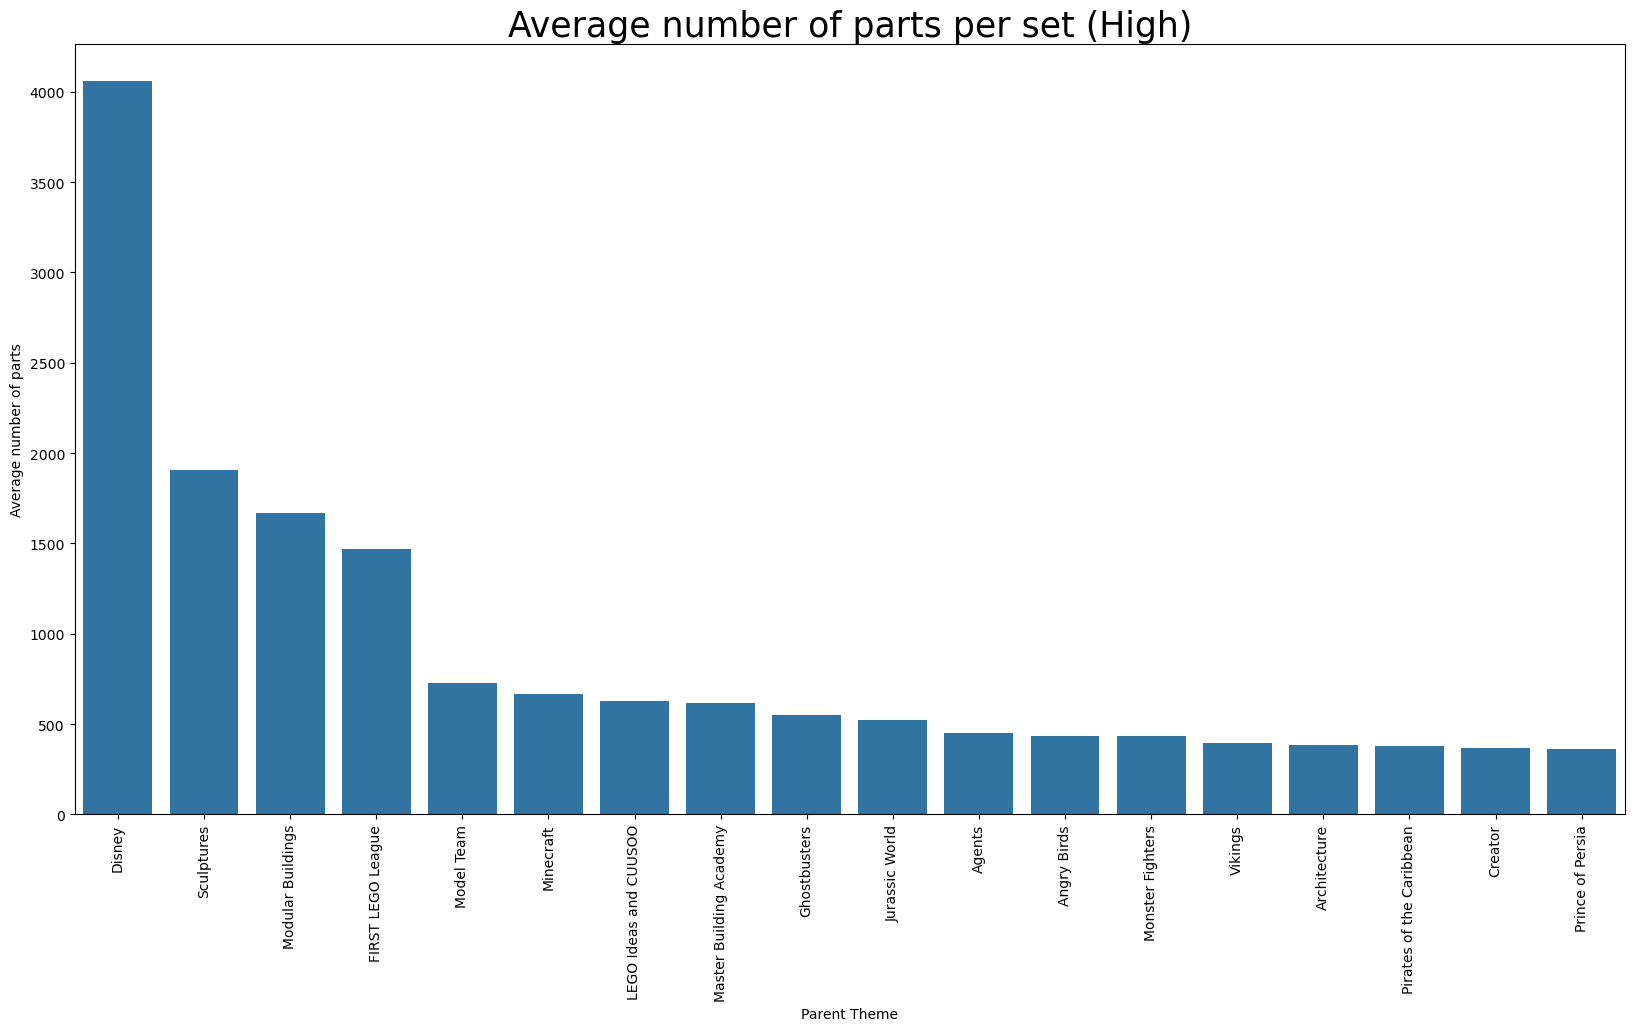

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x=high_avg_parts['parent_theme'], y=high_avg_parts['avg_num_parts'])
plt.xticks(rotation=90)
plt.title('Average number of parts per set (High)', fontsize=25)
plt.xlabel('Parent Theme')
plt.ylabel('Average number of parts')

In [67]:
low_avg_parts = avg_num_parts_per_set.loc[avg_num_parts_per_set['avg_num_parts'] < 90]

In [68]:
low_avg_parts

,parent_theme,avg_num_parts
8,Belville,87.553191
31,Disney's Mickey Mouse,86.200000
70,Pharaoh's Quest,84.000000
10,Bionicle,80.746939
18,Classic,72.905941
86,Sports,68.488889
45,Hero Factory,65.961538
106,Znap,64.500000
15,Bulk Bricks,58.256098
101,Universe,56.000000


Text(0, 0.5, 'Average number of parts')

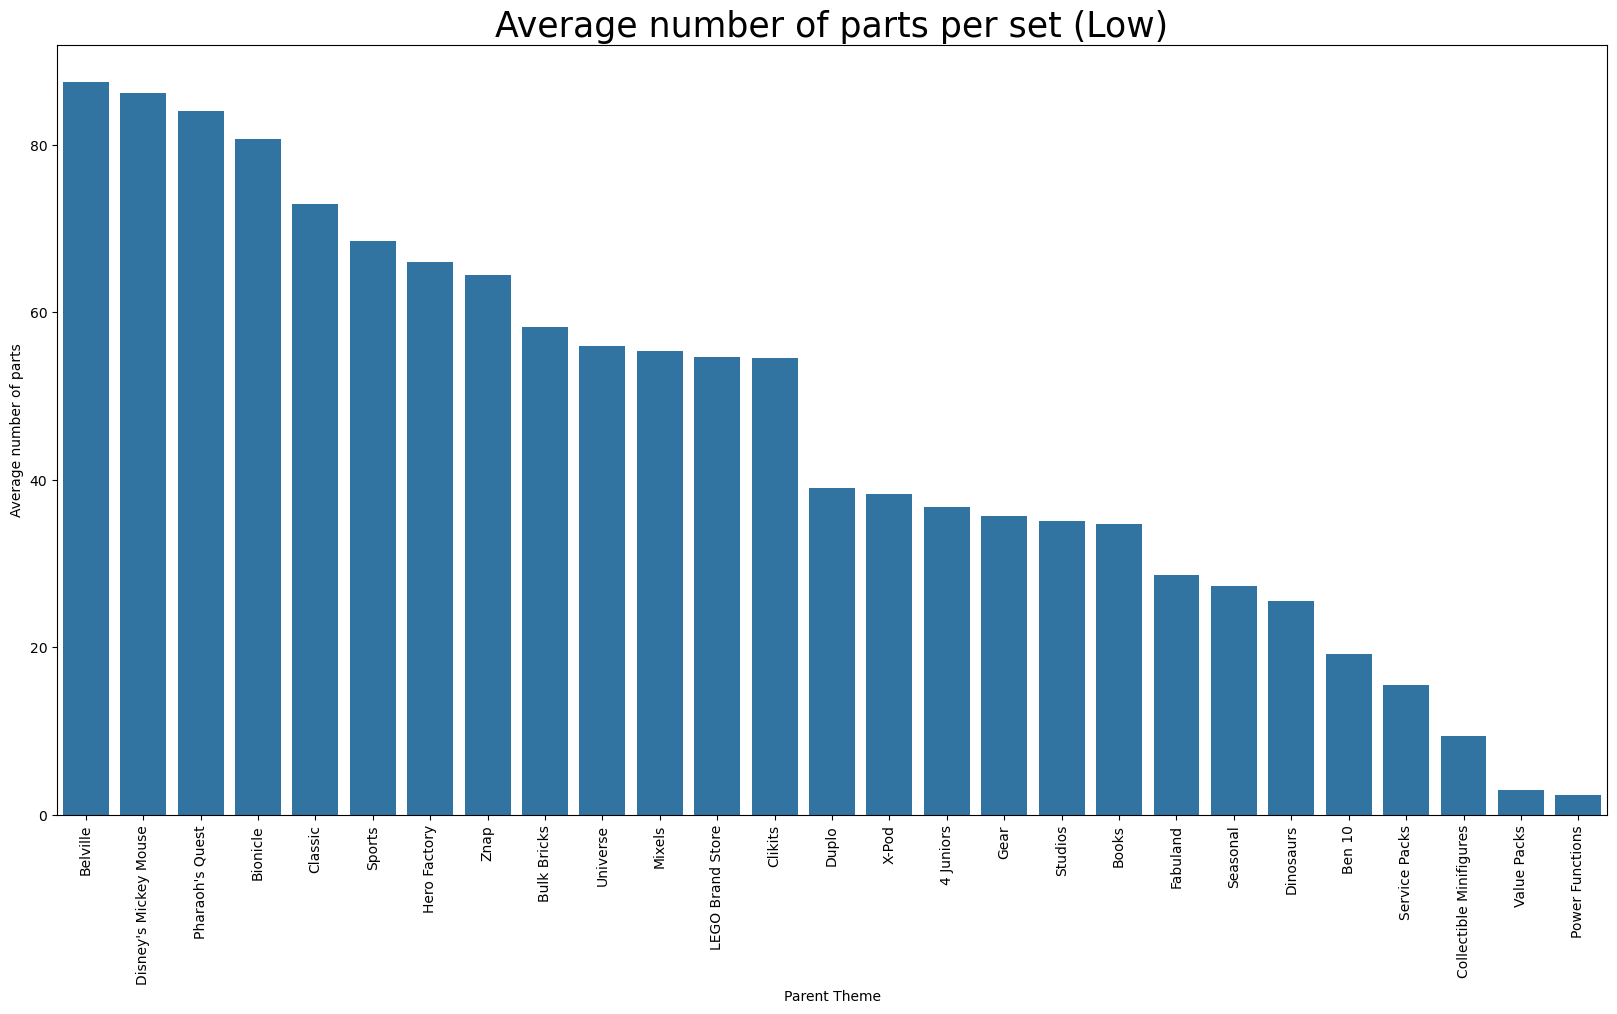

In [69]:
plt.figure(figsize=(20, 10))
sns.barplot(x=low_avg_parts['parent_theme'], y=low_avg_parts['avg_num_parts'])
plt.xticks(rotation=90)
plt.title("Average number of parts per set (Low)", fontsize=25)
plt.xlabel("Parent Theme")
plt.ylabel("Average number of parts")